### The Data
A subset of LendingClub dataset is used in this project. The complete dataset is present on Kaggle: https://www.kaggle.com/wordsforthewise/lending-club.

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform

### Our Goal
In this project we will go through some of the basic explortory data analysis. And after that we will try to build a model using tensorflow and keras to predict whether a person will fully pay the loan or not, depending on past data and also we will be able to tell if we should provide loan to person based on the fact that if the person would be able to pay back the loan, which will again depend on some baisc information about the person.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/DK/OneDrive/Desktop/udemy/TensorFlow_FILES/DATA/lending_club_loan_two.csv')

#### Some basic information about the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
loan_amnt               396030 non-null float64
term                    396030 non-null object
int_rate                396030 non-null float64
installment             396030 non-null float64
grade                   396030 non-null object
sub_grade               396030 non-null object
emp_title               373103 non-null object
emp_length              377729 non-null object
home_ownership          396030 non-null object
annual_inc              396030 non-null float64
verification_status     396030 non-null object
issue_d                 396030 non-null object
loan_status             396030 non-null object
purpose                 396030 non-null object
title                   394275 non-null object
dti                     396030 non-null float64
earliest_cr_line        396030 non-null object
open_acc                396030 non-null float64
pub_rec                 396030 non-nu

#### We will be attempting to predict loan_status, in that concern let's create a countplot

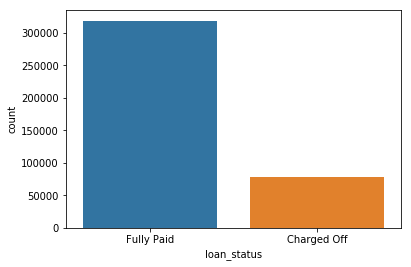

In [4]:
sns.countplot(df['loan_status'])

#### Below is a histogram for the loan_amnt column

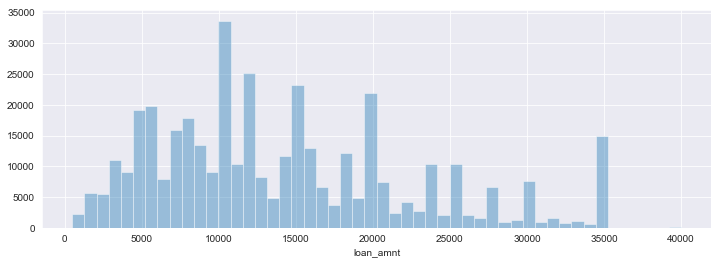

In [5]:
sns.set_style('darkgrid')
plt.figure(figsize  = (12, 4))
sns.distplot(df['loan_amnt'], kde = False)

#### We'll plot a heatmap to check the correlations between different continous varibles.

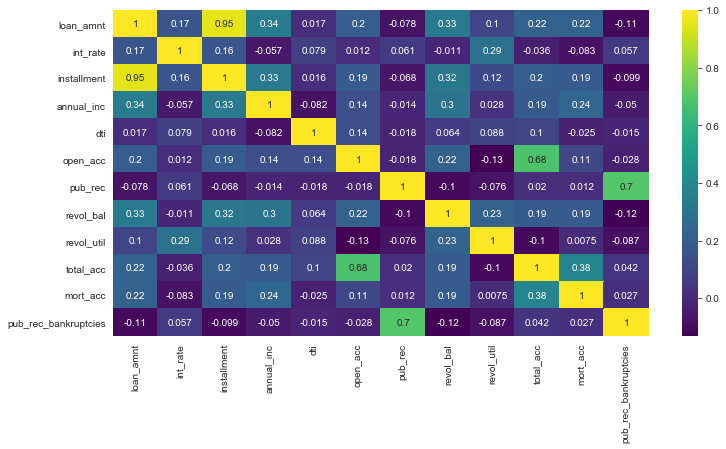

In [6]:
plt.figure(figsize = (12,6))
sns.heatmap(df.corr(), annot = True, cmap = 'viridis')

#### A perfect relation between loan amount and installment can be seen, so let's plot them against each other

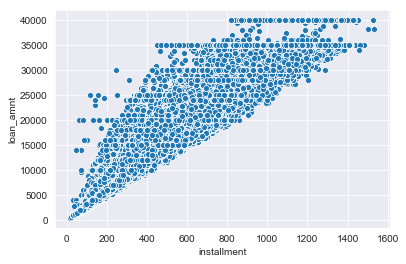

In [7]:
sns.scatterplot(x='installment', y= 'loan_amnt', data = df)

#### Creating a boxplot to see relationship between laon_status and loan_amnt.

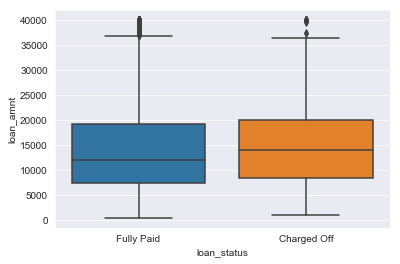

In [8]:
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = df)

#### Let's see the different grades and sub grades columns that Lending Club attributes to loan by plotting them against the loan_status column.

In [9]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [10]:
k = sorted(df['sub_grade'].unique())

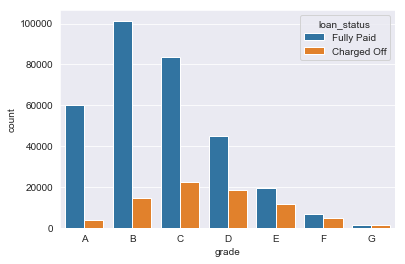

In [11]:
sns.countplot(df['grade'].sort_values(), hue= df['loan_status'])

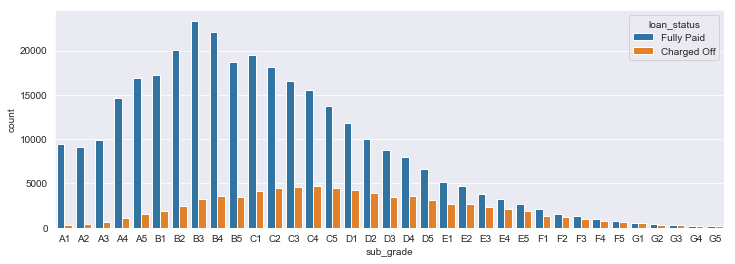

In [12]:
plt.figure(figsize = (12,4))
sns.countplot(df['sub_grade'].sort_values(), hue = df['loan_status'])

#### It looks like subgrades F and G don't get paid back that often. Below is the plot focusing on these subgrades.

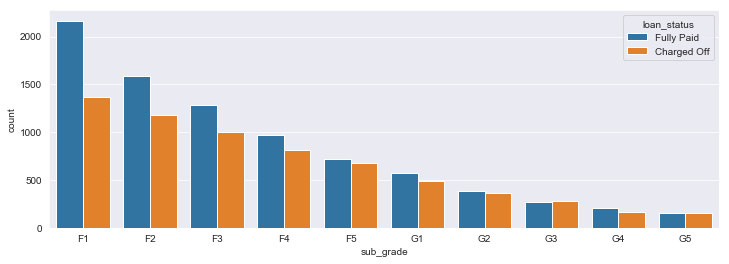

In [13]:
plt.figure(figsize = (12, 4))

f_and_g = df[(df['grade']=='F') | (df['grade'] == 'G')]
sub_grade_order = sorted(f_and_g['sub_grade'].unique())

sns.countplot(x = 'sub_grade', data = f_and_g, order = sub_grade_order, hue = 'loan_status')

#### Creating a new column of named 'loan_repaid' which will contain 1 if  loan was ''Fully Paid'' and 0 if it was ''Charged Off''.

In [14]:
def loan_paid(value):
    if value == 'Fully Paid':
        return 1
    else:
        return 0 

In [15]:
df['loan_repaid'] = df['loan_status'].apply(lambda x: loan_paid(x))

#### Below is a barplot showing correlation of numerical columns with 'loan_repaid' column.

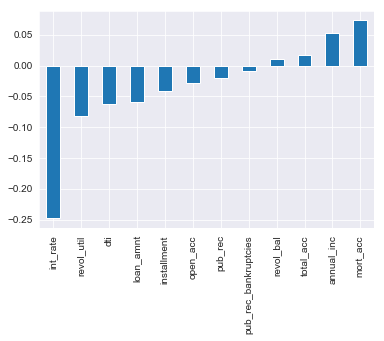

In [16]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind = 'bar')

## Data Preprocessing

Here the goal is to remove or fill the missing the data, remove unnecessary or reptitive features and convert categorical features to numerical data. 

### Missing Data

In this section we will explore the missing data column. We have to use diffrent factors to decide whether or not a particular column is useful or not, to see if we should keep or discard or replace the missing data.

In [17]:
df_null = pd.Series(df.isnull().sum())

Below is the percentage of missing values in different column

In [18]:
df_null/len(df) * 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

There are missing values six columns of our datatset, these are emp_title, emp_length, title, revol_util, mort_acc, pub_rec_bankruptcies

### 1. emp_title

Let's see how many unique employment titles are present and will it be feasible to convert the into dummy variables. 

In [19]:
df['emp_title'].nunique()

173105

In [20]:
df['emp_title'].value_counts()

Teacher                  4389
Manager                  4250
Registered Nurse         1856
RN                       1846
Supervisor               1830
                         ... 
VanRan Communications       1
DIALYSIS TECK               1
Professional Educator       1
Pannos-Winzeler Group       1
McKay-Dee Hospital          1
Name: emp_title, Length: 173105, dtype: int64

There are 173105 unique employment title, converting them into dummy variables does not seem appropriate. It is better to drop the column for employment title.

In [21]:
df = df.drop('emp_title', axis = 1)

### 2. emp_length

We will create a countplot for emp_length feature

In [22]:
order = ['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years', 
 '10+ years'
        ]

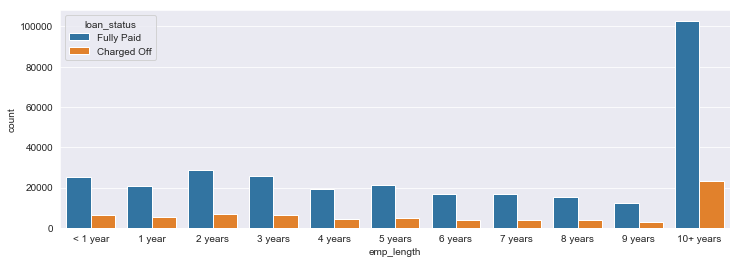

In [23]:
plt.figure(figsize = (12, 4))
sns.countplot(df['emp_length'], order = order, hue = df['loan_status'])

#### The plot above does not provide much information about the relationship between employment length and being charged off, now what we want is the percentage of charged off per category.

In [24]:
not_paid = df[df['loan_repaid']==0].groupby('emp_length').count()['loan_status']
not_paid

emp_length
1 year        5154
10+ years    23215
2 years       6924
3 years       6182
4 years       4608
5 years       5092
6 years       3943
7 years       4055
8 years       3829
9 years       3070
< 1 year      6563
Name: loan_status, dtype: int64

In [25]:
paid = df[df['loan_repaid']==1].groupby('emp_length').count()['loan_status']
paid

emp_length
1 year        20728
10+ years    102826
2 years       28903
3 years       25483
4 years       19344
5 years       21403
6 years       16898
7 years       16764
8 years       15339
9 years       12244
< 1 year      25162
Name: loan_status, dtype: int64

In [26]:
total = paid + not_paid

In [27]:
percentage_not_paid = (not_paid/total) * 100

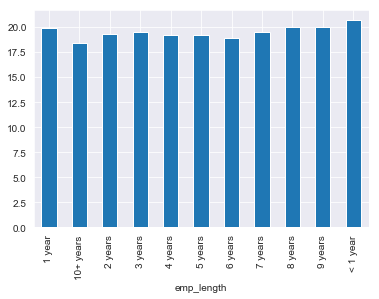

In [28]:
percentage_not_paid.plot(kind = 'bar')

#### There is not much variability in the plot above, which means that charged off rates are extremly similar over all employment lengths, so we can drop this column.

In [29]:
df = df.drop('emp_length', axis = 1)

### 3. title

By looking title and purpose column we can verify that both are providing th esame information, so we can drop the title column.

In [30]:
df = df.drop('title', axis = 1)

### 4. mort_acc

Let's check the correlation of all other numerical columns with the mort_acc column.

In [31]:
df.corr()['mort_acc']

loan_amnt               0.222315
int_rate               -0.082583
installment             0.193694
annual_inc              0.236320
dti                    -0.025439
open_acc                0.109205
pub_rec                 0.011552
revol_bal               0.194925
revol_util              0.007514
total_acc               0.381072
mort_acc                1.000000
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
Name: mort_acc, dtype: float64

It looks like the total_acc is highly correlated to the mort_acc feature column. What we will do is, check the mean mortgage account for every number of account held by the people and then fiiling up the missing value for mortgage account.

In [32]:
mean_mort_acc = df.groupby('total_acc').mean()['mort_acc']


In [33]:
def missing_mort(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return mean_mort_acc[total_acc]
    else:
        return mort_acc

In [34]:
df['mort_acc'] = df.apply(lambda x: missing_mort(x['total_acc'], x['mort_acc']), axis =1)

#### 4.revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. We can  remove the rows that are missing those values in those columns.

In [35]:
df = df.dropna()

In [36]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

### Handling Categorical Features
Uptill now we have taken care for the missing numerical data, now there is no missing value in our dataset. Now we have to convert the categorical data into dummy variables.

#### Let's check out all the columns of categorical features.

In [37]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

### term feature
The term feature contains values as either 36 months or 60 months, let's grab the numerical value only.

In [38]:
df['term'] = df['term'].apply(lambda term : int(term[:3]))

### grade feature
Grade is a sub part of sub_grade feature so we can drop this feature colun. 

In [39]:
df = df.drop('grade', axis = 1)

### sub_grade feature
This column can be converted into dummy variable, after getting the dummies we will drop the sub_grade feature column and will concatenate our dataframe with the dummy variables.

In [40]:
sub_grade_dummies = pd.get_dummies(df['sub_grade'], drop_first = True)

In [41]:
df = pd.concat([df.drop('sub_grade', axis = 1), sub_grade_dummies], axis = 1)

### home_ownership feature

In [42]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [43]:
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'], 'OTHER')

In [44]:
dummies = pd.get_dummies(df['home_ownership'], drop_first = True)

In [45]:
df = df.drop('home_ownership', axis = 1)

In [46]:
df = pd.concat([df, dummies], axis =1)

### verification_status, purpose, application_type, initial_list_status features
We can convert them into dummies directly andthen concat them with original dataframe.

In [47]:
dummies = pd.get_dummies(df[['verification_status', 'purpose', 'application_type', 'initial_list_status']], drop_first = True)

In [48]:
df = df.drop(['verification_status', 'purpose', 'application_type', 'initial_list_status'], axis = 1)

In [49]:
df= pd.concat([df, dummies], axis = 1)

### address feature
Let's grab the zip code of the different addresses of the address column.

In [50]:
df['zip_codes'] = df['address'].apply(lambda x : int(x[-5:]))

In [51]:
zip_dummies = pd.get_dummies(df['zip_codes'], drop_first = True)

In [52]:
df = pd.concat([df, zip_dummies], axis = 1)

In [53]:
df = df.drop(['zip_codes', 'address'], axis =1 )

In [54]:
df = df.drop('issue_d', axis = 1)

### earliest_cr_line feature
We would like to know about the year only, so let's grab the years from the earliest_cr_line feature column

In [55]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda x : x[-4:])

#### Also we can drop the loan_status feature column because we have already created a column  of name loan_repaid which contains the same information.

In [56]:
df = df.drop('loan_status', axis = 1)

In [57]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,...,initial_list_status_w,5113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,36,11.44,329.48,117000.0,26.24,1990,16.0,0.0,36369.0,...,1,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,65000.0,22.05,2004,17.0,0.0,20131.0,...,0,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,12.79,2007,13.0,0.0,11987.0,...,0,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,54000.0,2.60,2006,6.0,0.0,5472.0,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,55000.0,33.95,1999,13.0,0.0,24584.0,...,0,0,1,0,0,0,0,0,0,0


In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X = df.drop('loan_repaid', axis = 1).values
y = df['loan_repaid'].values

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [61]:
from sklearn.preprocessing import MinMaxScaler

In [62]:
scaler = MinMaxScaler()

In [63]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\DK\anaconda3\envs\python35\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [64]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [65]:
model = Sequential()

model.add(Dense(78, activation = 'relu'))

model.add(Dense(39, activation = 'relu'))

model.add(Dense(19, activation = 'relu'))

model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [66]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Train on 316175 samples, validate on 79044 samples
Epoch 1/25
316175/316175 [==============================] - 14s 45us/step - loss: 0.2846 - val_loss: 0.2678
Epoch 2/25
316175/316175 [==============================] - 11s 34us/step - loss: 0.2623 - val_loss: 0.2668
Epoch 3/25
316175/316175 [==============================] - 11s 33us/step - loss: 0.2602 - val_loss: 0.2625
Epoch 4/25
316175/316175 [==============================] - 11s 36us/step - loss: 0.2591 - val_loss: 0.2632
Epoch 5/25
316175/316175 [==============================] - 11s 35us/step - loss: 0.2586 - val_loss: 0.2621
Epoch 6/25
316175/316175 [==============================] - 11s 34us/step - loss: 0.2579 - val_loss: 0.2621
Epoch 7/25
316175/316175 [==============================] - 13s 40us/step - loss: 0.2575 - val_loss: 0.2612
Epoch 8/25
316175/316175 [==============================] - 12s 39us/step - loss: 0.2569 - val_loss: 0.2625
Epoch 9/25
316175/316175 [==============================] - 11s 35us/step - loss: 0.2

In [67]:
losses = pd.DataFrame(model.history.history)
losses

,loss,val_loss
0,0.284591,0.267785
1,0.262254,0.266783
2,0.260231,0.262476
3,0.259109,0.263205
4,0.258596,0.262083
5,0.257880,0.262149
6,0.257479,0.261217
7,0.256898,0.262478
8,0.256602,0.260678
9,0.256289,0.260969


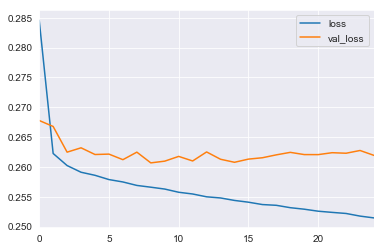

In [68]:
losses[['loss', 'val_loss']].plot()

In [69]:
from sklearn.metrics import classification_report,confusion_matrix

In [70]:
predictions = model.predict_classes(X_test)

In [71]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.48      0.63     15658
           1       0.88      0.99      0.93     63386

   micro avg       0.89      0.89      0.89     79044
   macro avg       0.89      0.73      0.78     79044
weighted avg       0.89      0.89      0.87     79044



In [72]:
confusion_matrix(y_test,predictions)

array([[ 7494,  8164],
       [  787, 62599]], dtype=int64)

### Model with early stopping

In [73]:
from tensorflow.keras.callbacks import EarlyStopping

In [74]:
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose= 1, patience = 25)

In [77]:
model_1 = Sequential()

model_1.add(Dense(78, activation = 'relu'))
model_1.add(Dropout(0.5))

model_1.add(Dense(39, activation = 'relu'))
model_1.add(Dropout(0.5))

model_1.add(Dense(19, activation = 'relu'))
model_1.add(Dropout(0.5))

model_1.add(Dense(8, activation = 'relu'))
model_1.add(Dropout(0.5))

model_1.add(Dense(units = 1, activation = 'sigmoid'))

model_1.compile(loss='binary_crossentropy', optimizer='adam')

In [108]:
model_1.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          callbacks = [early_stop])

Train on 316175 samples, validate on 79044 samples
Epoch 1/25
316175/316175 [==============================] - 17s 54us/step - loss: 0.2798 - val_loss: 0.2632
Epoch 2/25
316175/316175 [==============================] - 16s 51us/step - loss: 0.2803 - val_loss: 0.2647
Epoch 3/25
316175/316175 [==============================] - 17s 55us/step - loss: 0.2793 - val_loss: 0.2630
Epoch 4/25
316175/316175 [==============================] - 14s 45us/step - loss: 0.2797 - val_loss: 0.2630
Epoch 5/25
316175/316175 [==============================] - 17s 54us/step - loss: 0.2794 - val_loss: 0.2630
Epoch 6/25
316175/316175 [==============================] - 16s 51us/step - loss: 0.2793 - val_loss: 0.2627
Epoch 7/25
316175/316175 [==============================] - 16s 51us/step - loss: 0.2800 - val_loss: 0.2639
Epoch 8/25
316175/316175 [==============================] - 17s 54us/step - loss: 0.2797 - val_loss: 0.2638
Epoch 9/25
316175/316175 [==============================] - 16s 51us/step - loss: 0.2

In [109]:
loss = pd.DataFrame(model_1.history.history)

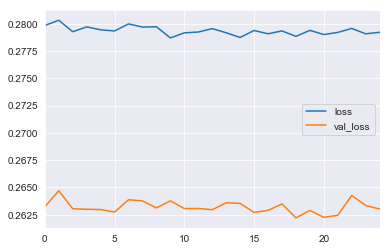

In [110]:
loss.plot()

In [86]:
prds = model_1.predict_classes(X_test)

In [111]:
accuracy_score(y_test, prds) * 100

88.69237386771924

### Decision Tree 

In [91]:
from sklearn.tree import DecisionTreeClassifier

In [92]:
DTree = DecisionTreeClassifier()

In [93]:
DTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [94]:
predictionss= DTree.predict(X_test)

In [95]:
print(classification_report(y_test, predictionss))

              precision    recall  f1-score   support

           0       0.57      0.59      0.58     15658
           1       0.90      0.89      0.89     63386

   micro avg       0.83      0.83      0.83     79044
   macro avg       0.73      0.74      0.74     79044
weighted avg       0.83      0.83      0.83     79044



In [103]:
accuracy_score(y_test, predictionss) * 100

82.91331410353727

### Random Forest

In [96]:
from sklearn.ensemble import RandomForestClassifier

In [97]:
rfc = RandomForestClassifier(n_estimators=200)

In [98]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [99]:
rfc_prd = rfc.predict(X_test)

In [96]:
print(classification_report(y_test, rfc_prd))

              precision    recall  f1-score   support

           0       0.96      0.45      0.61     15658
           1       0.88      1.00      0.93     63386

   micro avg       0.89      0.89      0.89     79044
   macro avg       0.92      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [82]:
from sklearn.metrics import accuracy_score

In [101]:
accuracy_score(y_test, rfc_prd) * 100

88.79105308435807